In [87]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



**Data Pre-processing**

Inspected the data for possible issues around distributions and missingness to inform the data processing required.
Creates a function *preprocess_stroke_data* to clean the data for minor encoding inconsistencies and to drop cases with missing values.

In [ ]:
# import CSV file as df
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

# Display info() about the data frame and first few rows
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3116 non-null   int64  
 1   gender             3116 non-null   object 
 2   age                3116 non-null   float64
 3   hypertension       3116 non-null   int64  
 4   heart_disease      3116 non-null   int64  
 5   ever_married       3116 non-null   object 
 6   work_type          3116 non-null   object 
 7   Residence_type     3116 non-null   object 
 8   avg_glucose_level  3116 non-null   float64
 9   bmi                2970 non-null   float64
 10  smoking_status     3116 non-null   object 
 11  stroke             3116 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 292.2+ KB
None


In [99]:
#get summary statistics of the data frame
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3116.000000,3116,3116.000000,3116.000000,3116.000000,3116,3116,3116,3116.000000,2970.000000,3116,3116.000000
unique,NaN,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,1802,NaN,NaN,NaN,2085,1831,1574,NaN,NaN,1145,NaN
mean,36297.400834,NaN,44.365597,0.105263,0.063864,NaN,NaN,NaN,107.817461,29.123165,NaN,0.079910
std,21150.974679,NaN,22.669632,0.306941,0.244550,NaN,NaN,NaN,46.400254,7.907376,NaN,0.271198
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.220000,10.300000,NaN,0.000000
25%,17440.000000,NaN,26.000000,0.000000,0.000000,NaN,NaN,NaN,77.670000,23.700000,NaN,0.000000
50%,36371.500000,NaN,47.000000,0.000000,0.000000,NaN,NaN,NaN,92.965000,28.200000,NaN,0.000000
75%,54581.750000,NaN,62.000000,0.000000,0.000000,NaN,NaN,NaN,115.875000,33.300000,NaN,0.000000


In [100]:

# Check for missing values
missing_values = df.isnull().sum()
# Display missing values
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
# Display duplicate rows count
print(f"Number of duplicate rows: {duplicate_rows}")


Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  146
smoking_status         0
stroke                 0
dtype: int64
Number of duplicate rows: 0


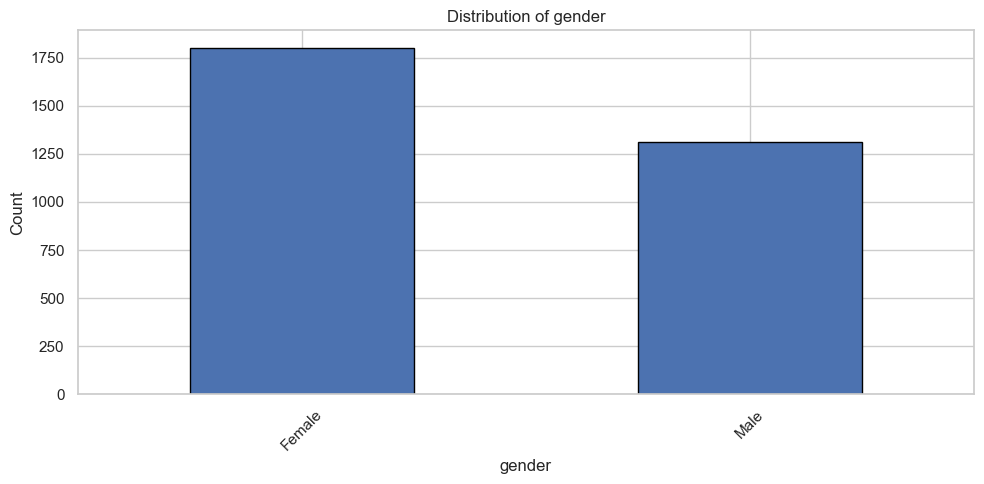

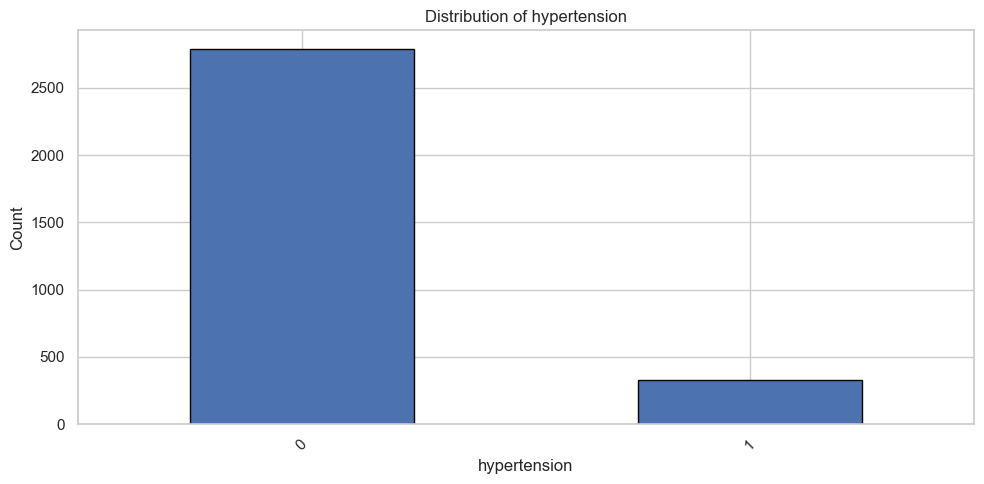

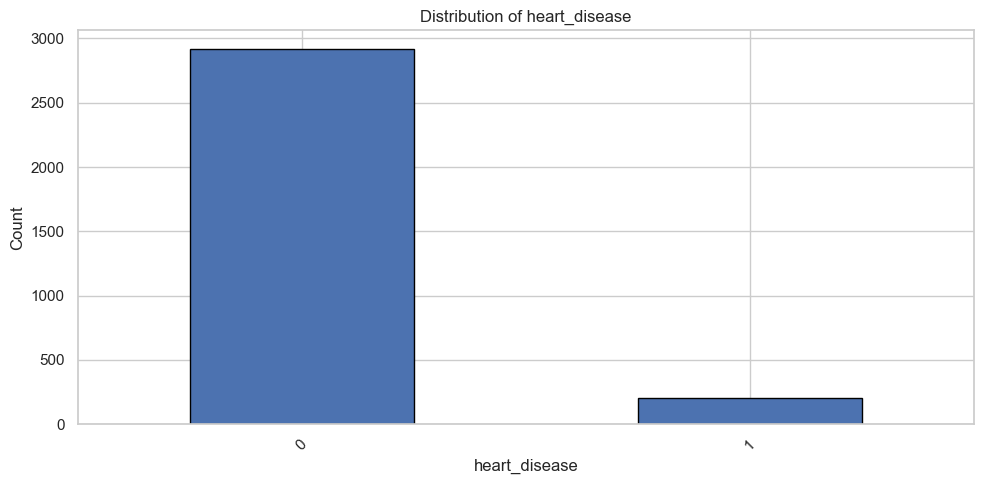

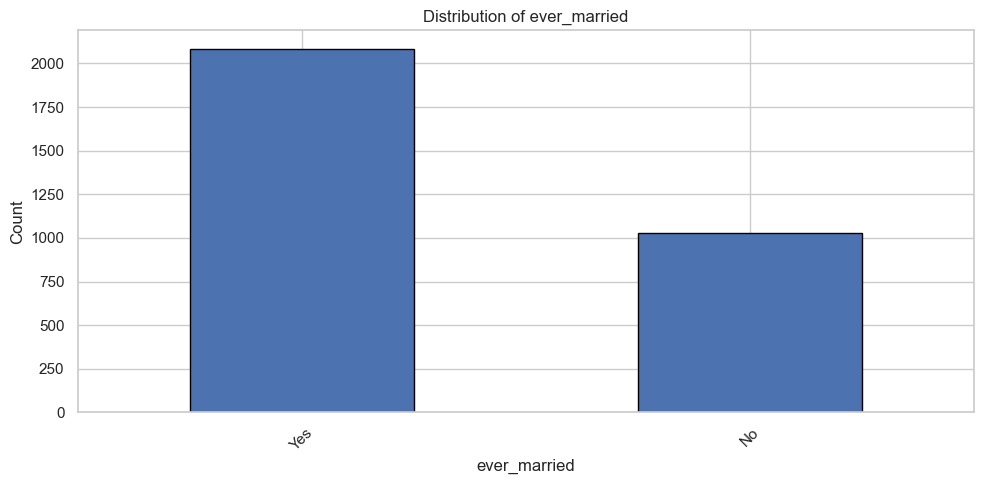

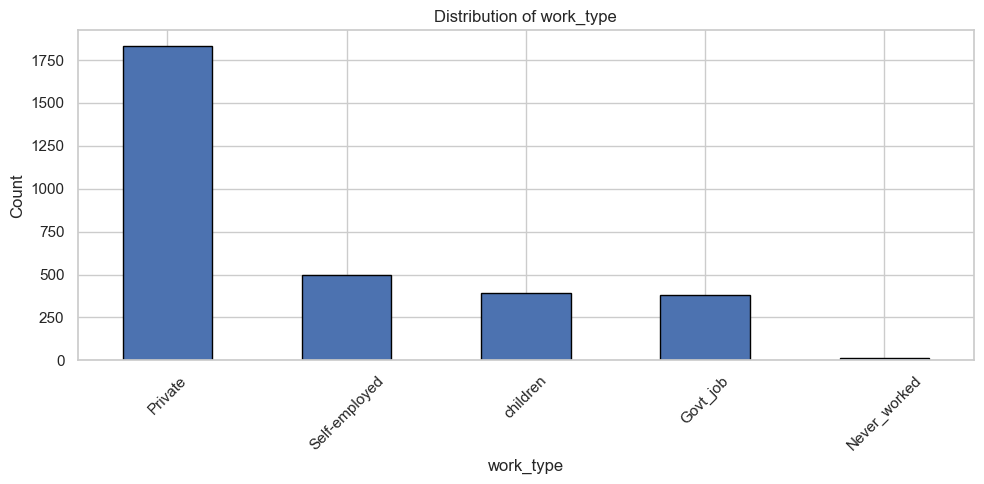

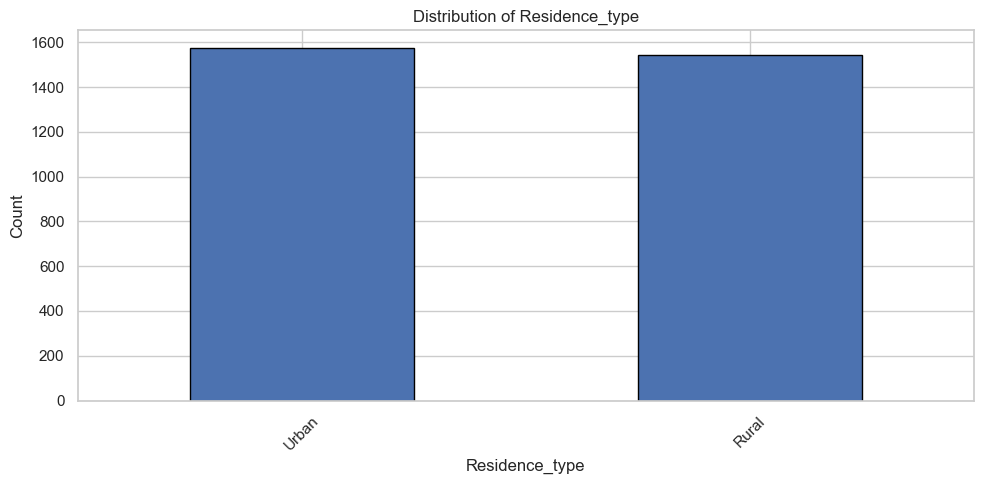

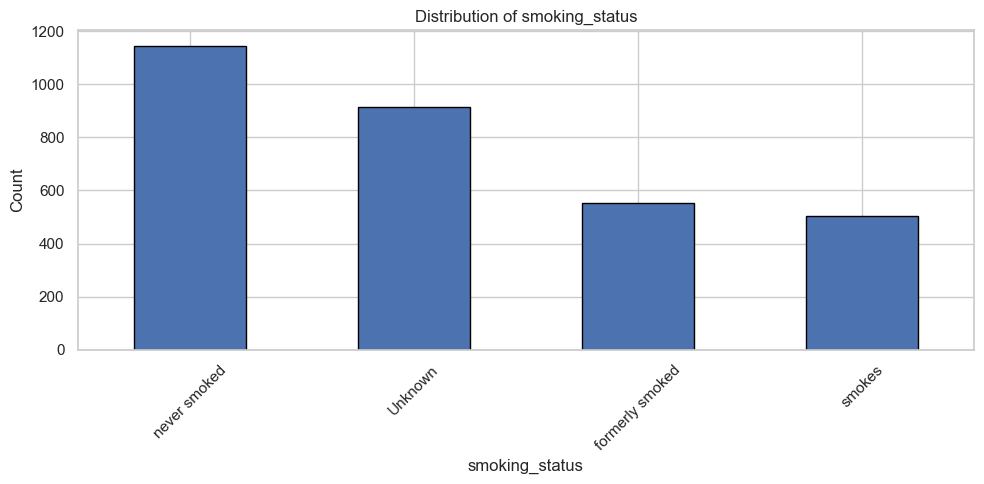

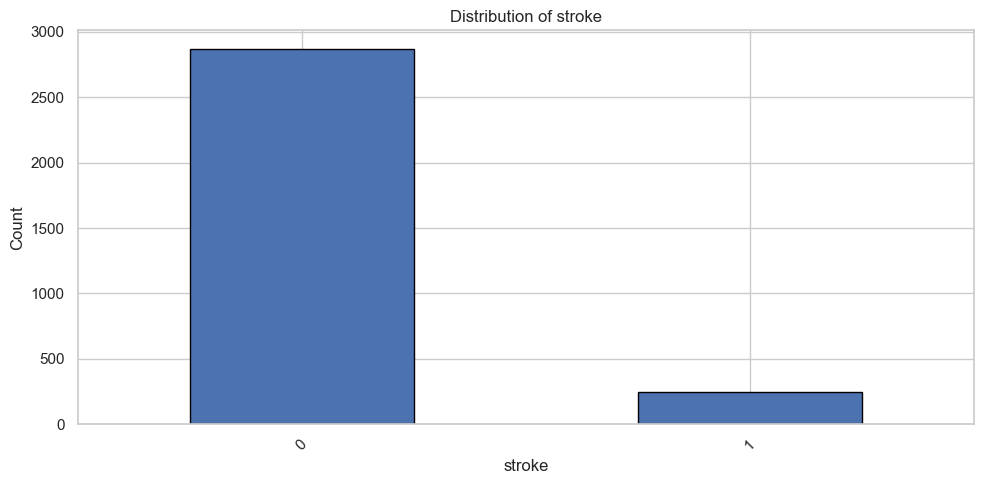

In [101]:
#Create plots to inspect categorical (object and int64) variables

for column in df.select_dtypes(include=['object', 'int64']).columns:
    if column != 'id':
        plt.figure(figsize=(10, 5))
        df[column].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

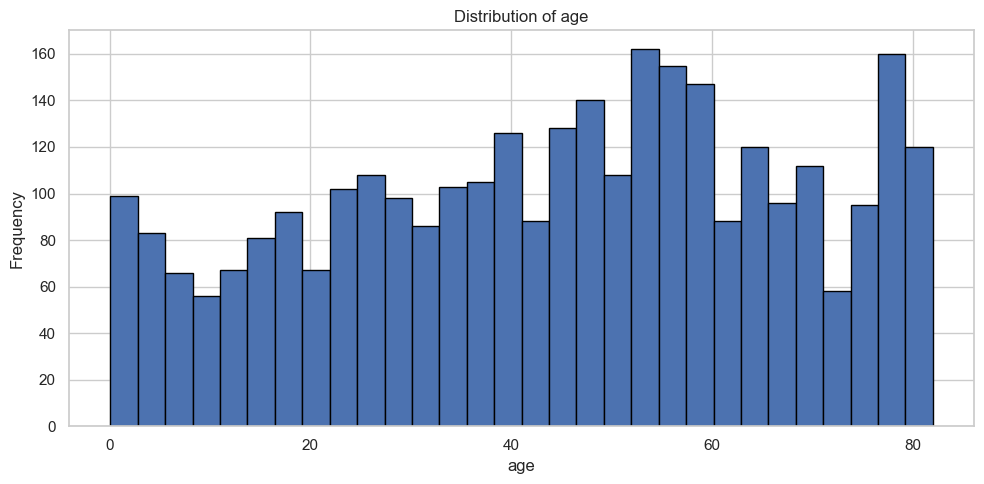

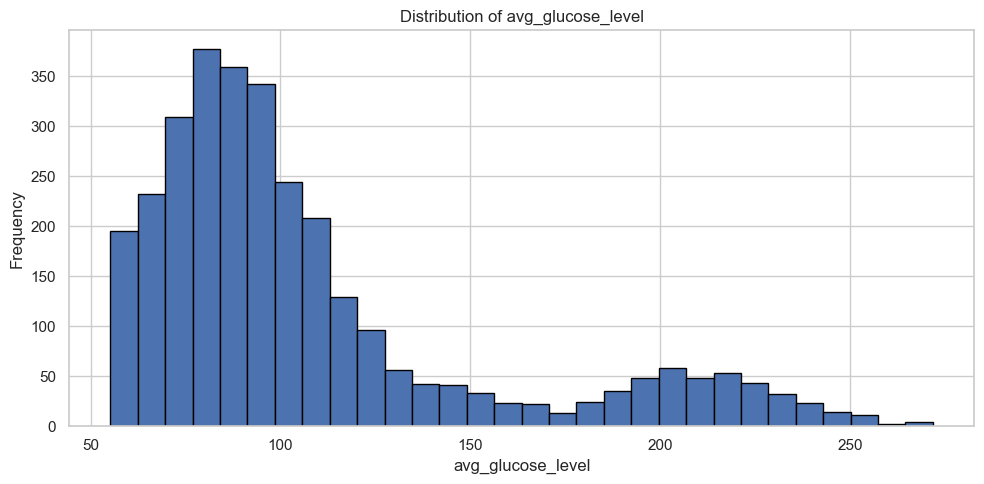

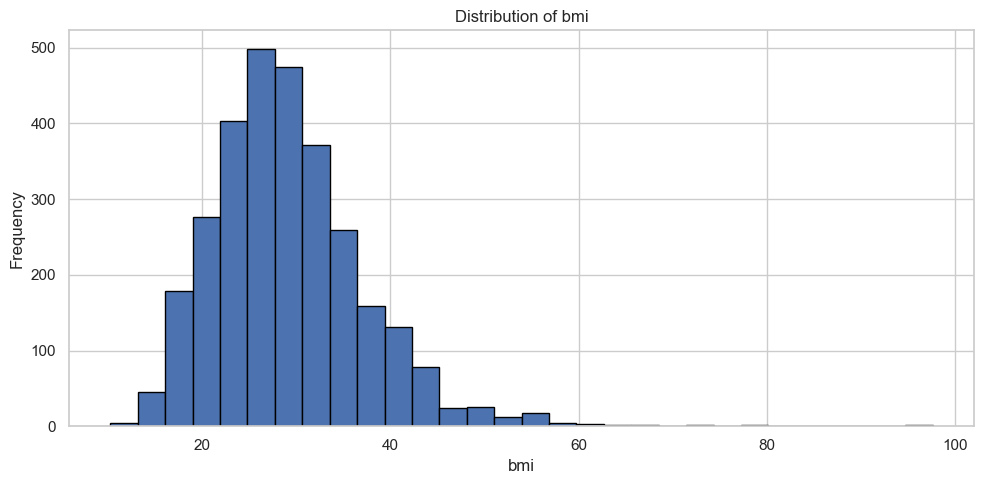

In [102]:
# Create plots to inspect continuous numerica features
for column in df.select_dtypes(include=['float64']).columns:
    if column != 'id':
        plt.figure(figsize=(10, 5))
        df[column].plot(kind='hist', bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

In [ ]:
##Notes to team:
#1) We will have to handle the 'id' column separately as it is not a feature but an identifier. Left it for now so that we can connect the cleaned data back to the original dataset if needed.
#2) We will also need to decide on whether to include cases where smoking status is 'Unknown' as this might not be relevant to our business case. Leaving for now until we discuss as a team.

# Create a function to preprocess the stroke data
def preprocess_stroke_data(df):
    # Encode 'ever_married' to 1 for "Yes" and 0 for "No" to match the rest of the dataset
    df['ever_married'] = (df['ever_married'].astype(str).str.strip().str.lower() == 'yes').astype(int) # Allows for inconsistent casing and whitespace
    
    # Remove rows with missing values
    df = df.dropna()

    # Remove 'Other' from gender allowing for inconsistent casing and whitespace
    df = df[~df['gender'].astype(str).str.strip().str.lower().eq('other')]

    return df

# Create a cleaned version of the data frame
df_cleaned = preprocess_stroke_data(df)

In [104]:
# Save the cleaned data frame to a CSV file for convenience
output_path = '../data/processed/cleaned_stroke_data.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_cleaned.to_csv(output_path, index=False)

# Review the data frame after preprocessing
print(df_cleaned.info())
df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 2970 entries, 0 to 3115
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2970 non-null   int64  
 1   gender             2970 non-null   object 
 2   age                2970 non-null   float64
 3   hypertension       2970 non-null   int64  
 4   heart_disease      2970 non-null   int64  
 5   ever_married       2970 non-null   int32  
 6   work_type          2970 non-null   object 
 7   Residence_type     2970 non-null   object 
 8   avg_glucose_level  2970 non-null   float64
 9   bmi                2970 non-null   float64
 10  smoking_status     2970 non-null   object 
 11  stroke             2970 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 290.0+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,2970.000000,2970,2970.000000,2970.000000,2970.000000,2970.000000,2970,2970,2970.000000,2970.000000,2970,2970.000000
unique,NaN,2,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,NaN,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,1733,NaN,NaN,NaN,NaN,1747,1493,NaN,NaN,1115,NaN
mean,36850.806397,NaN,43.863771,0.098653,0.058586,0.663636,NaN,NaN,107.009404,29.123165,NaN,0.070370
std,20982.314413,NaN,22.623058,0.298246,0.234887,0.472545,NaN,NaN,45.687458,7.907376,NaN,0.255813
min,77.000000,NaN,0.080000,0.000000,0.000000,0.000000,NaN,NaN,55.220000,10.300000,NaN,0.000000
25%,18220.500000,NaN,26.000000,0.000000,0.000000,0.000000,NaN,NaN,77.600000,23.700000,NaN,0.000000
50%,36953.000000,NaN,46.000000,0.000000,0.000000,1.000000,NaN,NaN,92.815000,28.200000,NaN,0.000000
75%,54982.500000,NaN,61.000000,0.000000,0.000000,1.000000,NaN,NaN,115.190000,33.300000,NaN,0.000000
